In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from Utils.DataAnalysis import *
from Utils.CorrelationFiltering import *

# Load the CSV file
data = pd.read_csv('Data/Data.csv')

In [12]:
# First rows of the dataset
data.head()

,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10,...,Feature-20,Feature-21,Feature-22,Feature-23,Feature-24,Feature-25,Feature-26,Feature-27,Feature-28,label
0,0.421100,0.311280,0.310160,0.353980,0.105571,-0.175377,0.091689,0.420820,0.306320,0.310420,...,-0.193568,0.095023,0.388280,0.273980,0.285980,0.330560,0.105511,-0.177666,0.116607,0
1,0.423193,0.290619,0.254927,0.281671,0.137560,-0.244459,0.019792,0.431956,0.301435,0.257873,...,-0.239738,0.043115,0.379723,0.252394,0.238974,0.265378,0.135794,-0.245699,0.070134,1
2,0.319944,0.240518,0.192145,0.214765,0.104318,-0.246053,-0.044005,0.343052,0.246591,0.211662,...,-0.236559,0.004437,0.333574,0.236871,0.211484,0.236254,0.110759,-0.240793,0.024197,0
3,0.284980,0.215349,0.200726,0.220252,0.071626,-0.162805,0.019107,0.285095,0.207685,0.209087,...,-0.179621,0.087678,0.256530,0.185122,0.184672,0.205522,0.076848,-0.156871,0.059417,1
4,0.250840,0.165840,0.168420,0.196660,0.146182,-0.206290,0.109897,0.254640,0.167140,0.176960,...,-0.198952,0.131649,0.248810,0.160760,0.172700,0.200670,0.137797,-0.197421,0.116308,1


In [13]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature-1   9168 non-null   float64
 1   Feature-2   9168 non-null   float64
 2   Feature-3   9168 non-null   float64
 3   Feature-4   9168 non-null   float64
 4   Feature-5   9168 non-null   float64
 5   Feature-6   9168 non-null   float64
 6   Feature-7   9168 non-null   float64
 7   Feature-8   9168 non-null   float64
 8   Feature-9   9168 non-null   float64
 9   Feature-10  9168 non-null   float64
 10  Feature-11  9168 non-null   float64
 11  Feature-12  9168 non-null   float64
 12  Feature-13  9168 non-null   float64
 13  Feature-14  9168 non-null   float64
 14  Feature-15  9168 non-null   float64
 15  Feature-16  9168 non-null   float64
 16  Feature-17  9168 non-null   float64
 17  Feature-18  9168 non-null   float64
 18  Feature-19  9168 non-null   float64
 19  Feature-20  9168 non-null  

Categorical columns:
['label']

Non-categorical columns:
['Feature-1', 'Feature-2', 'Feature-3', 'Feature-4', 'Feature-5', 'Feature-6', 'Feature-7', 'Feature-8', 'Feature-9', 'Feature-10', 'Feature-11', 'Feature-12', 'Feature-13', 'Feature-14', 'Feature-15', 'Feature-16', 'Feature-17', 'Feature-18', 'Feature-19', 'Feature-20', 'Feature-21', 'Feature-22', 'Feature-23', 'Feature-24', 'Feature-25', 'Feature-26', 'Feature-27', 'Feature-28']


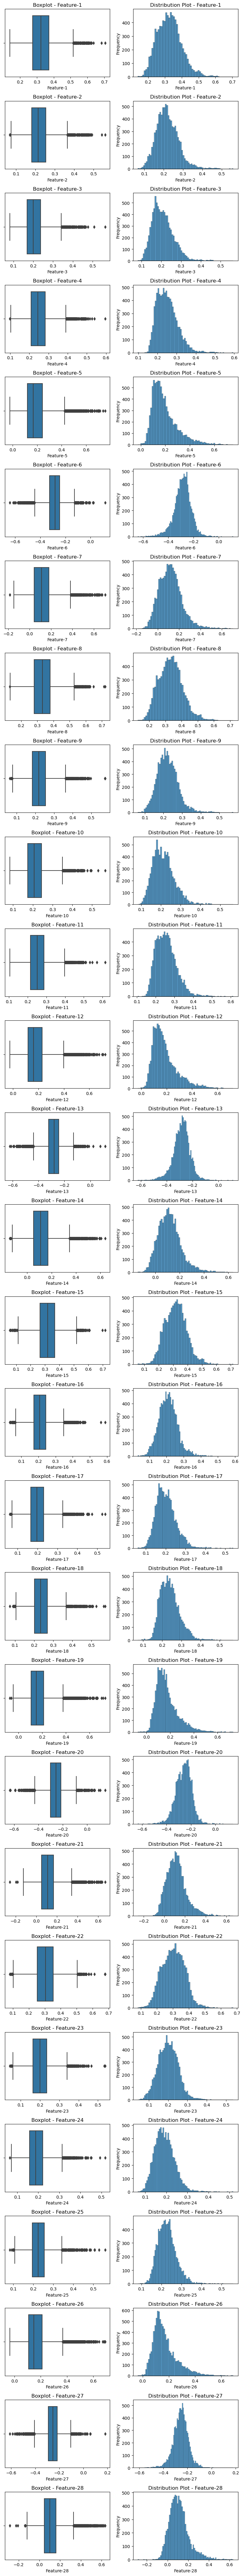

In [2]:
categorical_cols, non_categorical_cols = checkCategoricalColumns(data)

print("Categorical columns:")
print(categorical_cols)

print("\nNon-categorical columns:")
print(non_categorical_cols)


# Showing outliers of each feature
plt.figure(figsize=(8, 3 * len(non_categorical_cols)))
for i, column in enumerate(non_categorical_cols):
    plt.subplot(len(non_categorical_cols), 2, 2*i+1)
    sns.boxplot(x=data[column])
    plt.xlabel(column)
    plt.title('Boxplot - {}'.format(column))

    plt.subplot(len(non_categorical_cols), 2, 2*i+2)
    sns.histplot(data[column], kde=False)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Distribution Plot - {}'.format(column))

plt.tight_layout()
plt.show()

         Feature-1    Feature-2    Feature-3    Feature-4    Feature-5  \
count  9168.000000  9168.000000  9168.000000  9168.000000  9168.000000   
mean      0.326744     0.219226     0.207228     0.250473     0.193739   
std       0.071936     0.056568     0.053388     0.054057     0.103828   
min       0.138820     0.067133     0.081467     0.097500    -0.024089   
25%       0.274158     0.180341     0.168828     0.209235     0.120340   
50%       0.323591     0.213870     0.200525     0.243655     0.168051   
75%       0.371088     0.254079     0.238045     0.281969     0.241900   
max       0.705312     0.559585     0.563330     0.595111     0.754616   

         Feature-6    Feature-7    Feature-8    Feature-9   Feature-10  ...  \
count  9168.000000  9168.000000  9168.000000  9168.000000  9168.000000  ...   
mean     -0.287254     0.118280     0.333095     0.221828     0.213563  ...   
std       0.068677     0.106487     0.073580     0.055993     0.054540  ...   
min      -0.64223

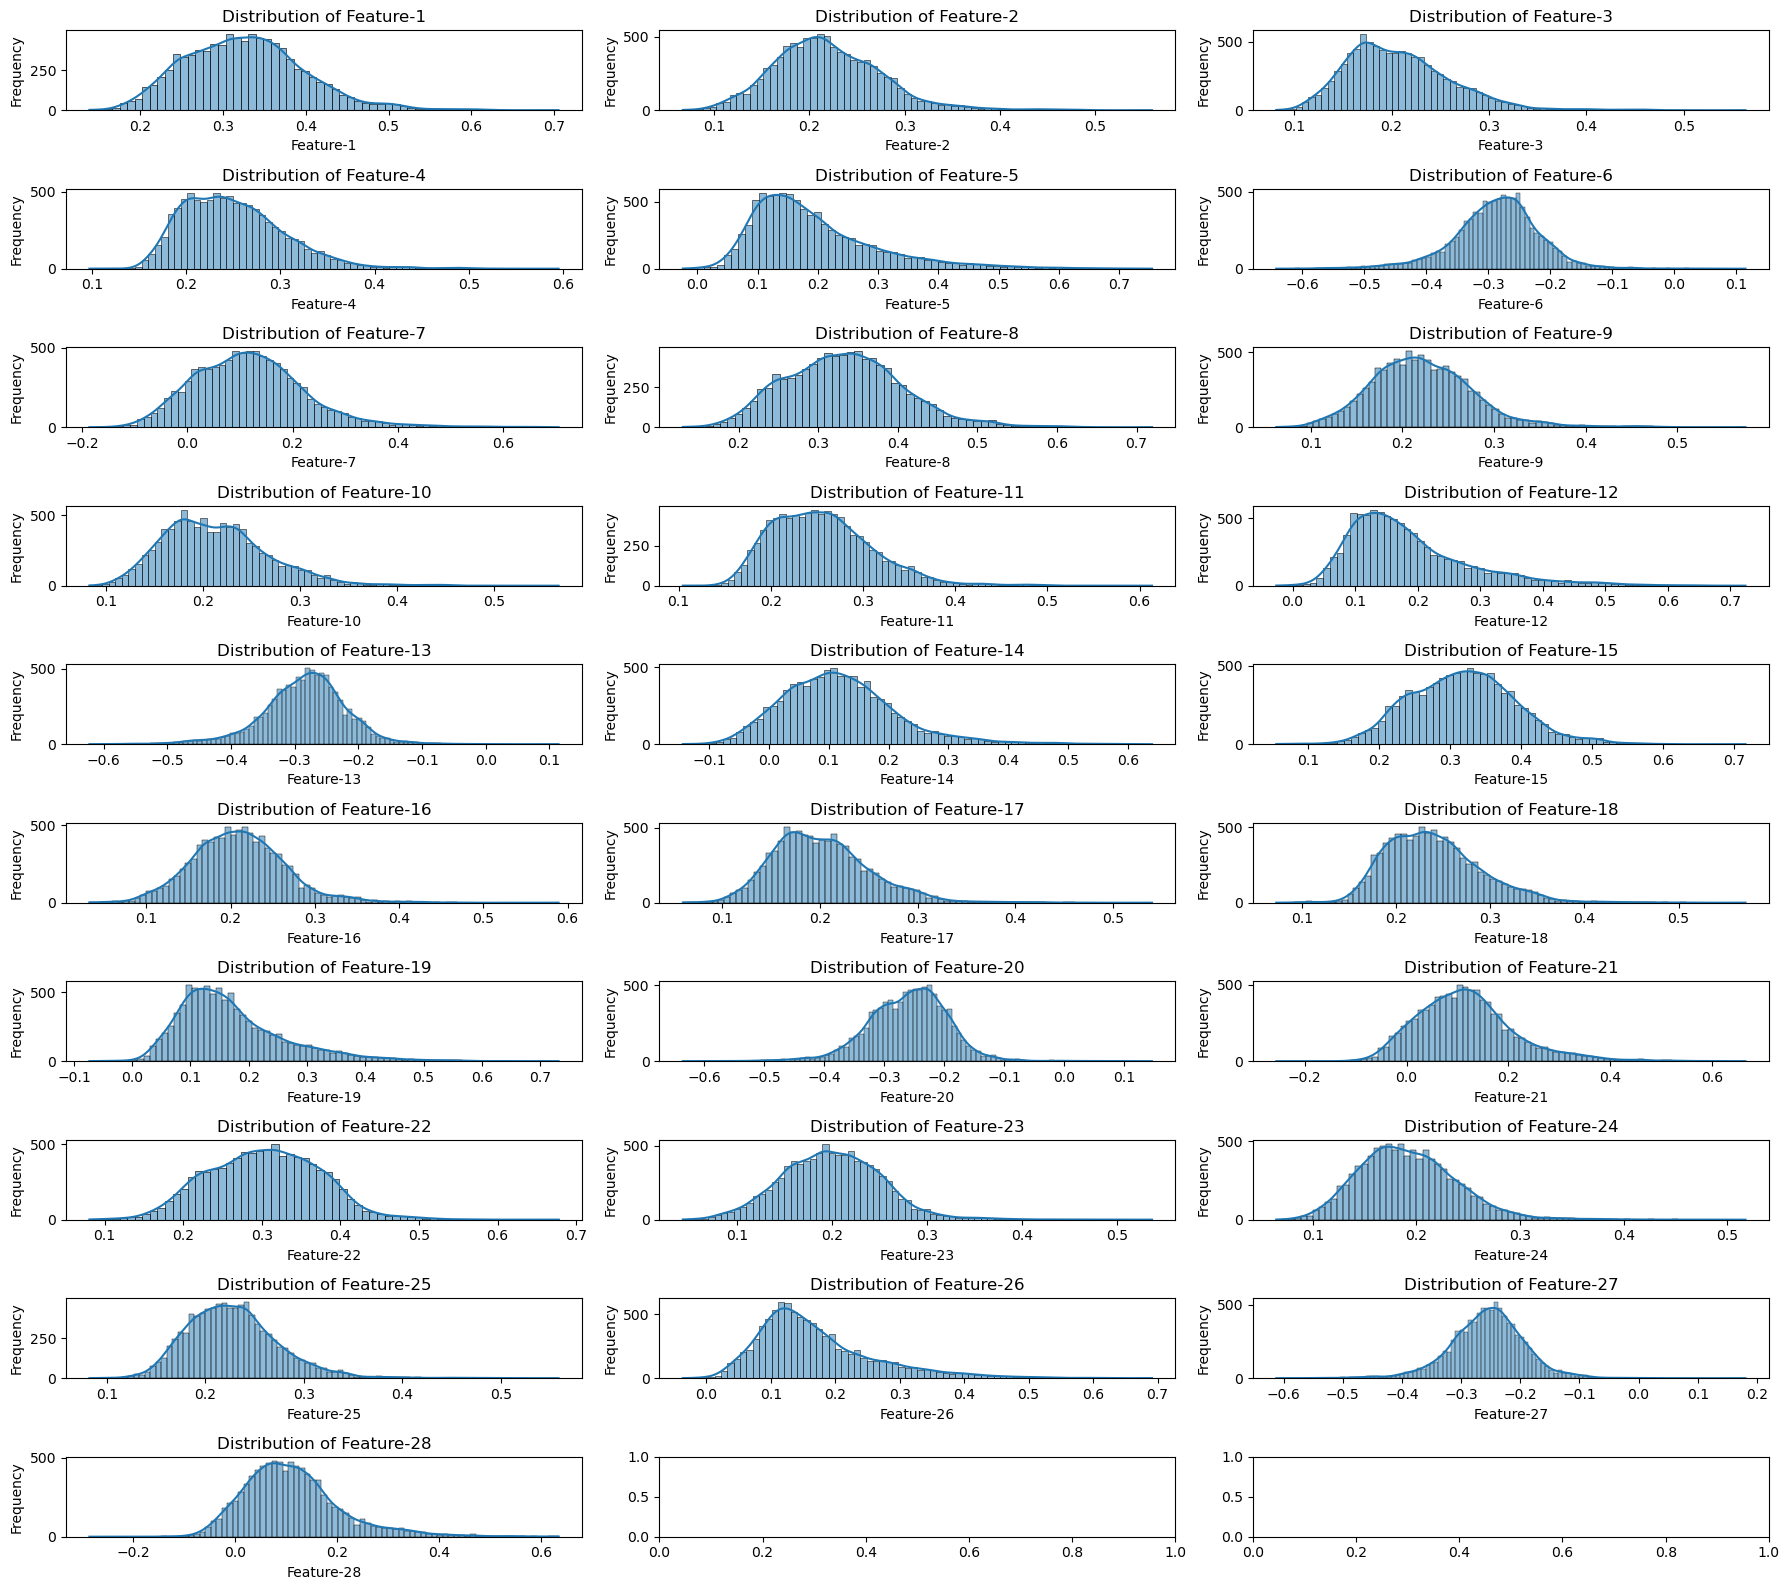

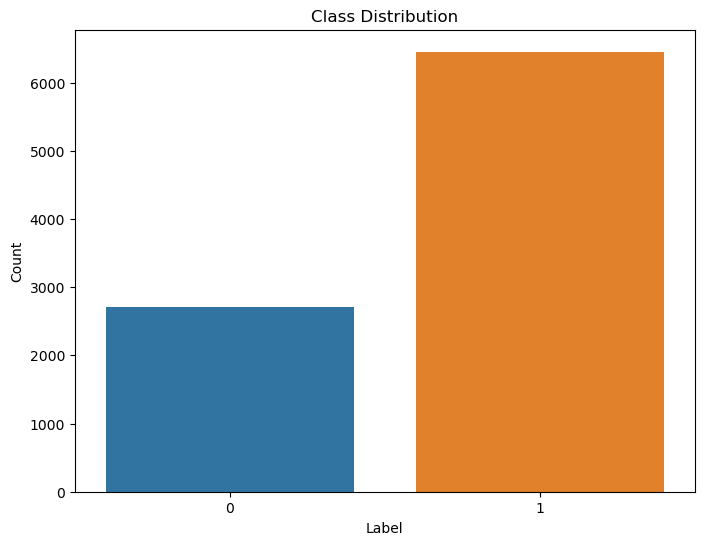

interval columns not set, guessing: ['Feature-1', 'Feature-2', 'Feature-3', 'Feature-4', 'Feature-5', 'Feature-6', 'Feature-7', 'Feature-8', 'Feature-9', 'Feature-10', 'Feature-11', 'Feature-12', 'Feature-13', 'Feature-14', 'Feature-15', 'Feature-16', 'Feature-17', 'Feature-18', 'Feature-19', 'Feature-20', 'Feature-21', 'Feature-22', 'Feature-23', 'Feature-24', 'Feature-25', 'Feature-26', 'Feature-27', 'Feature-28']


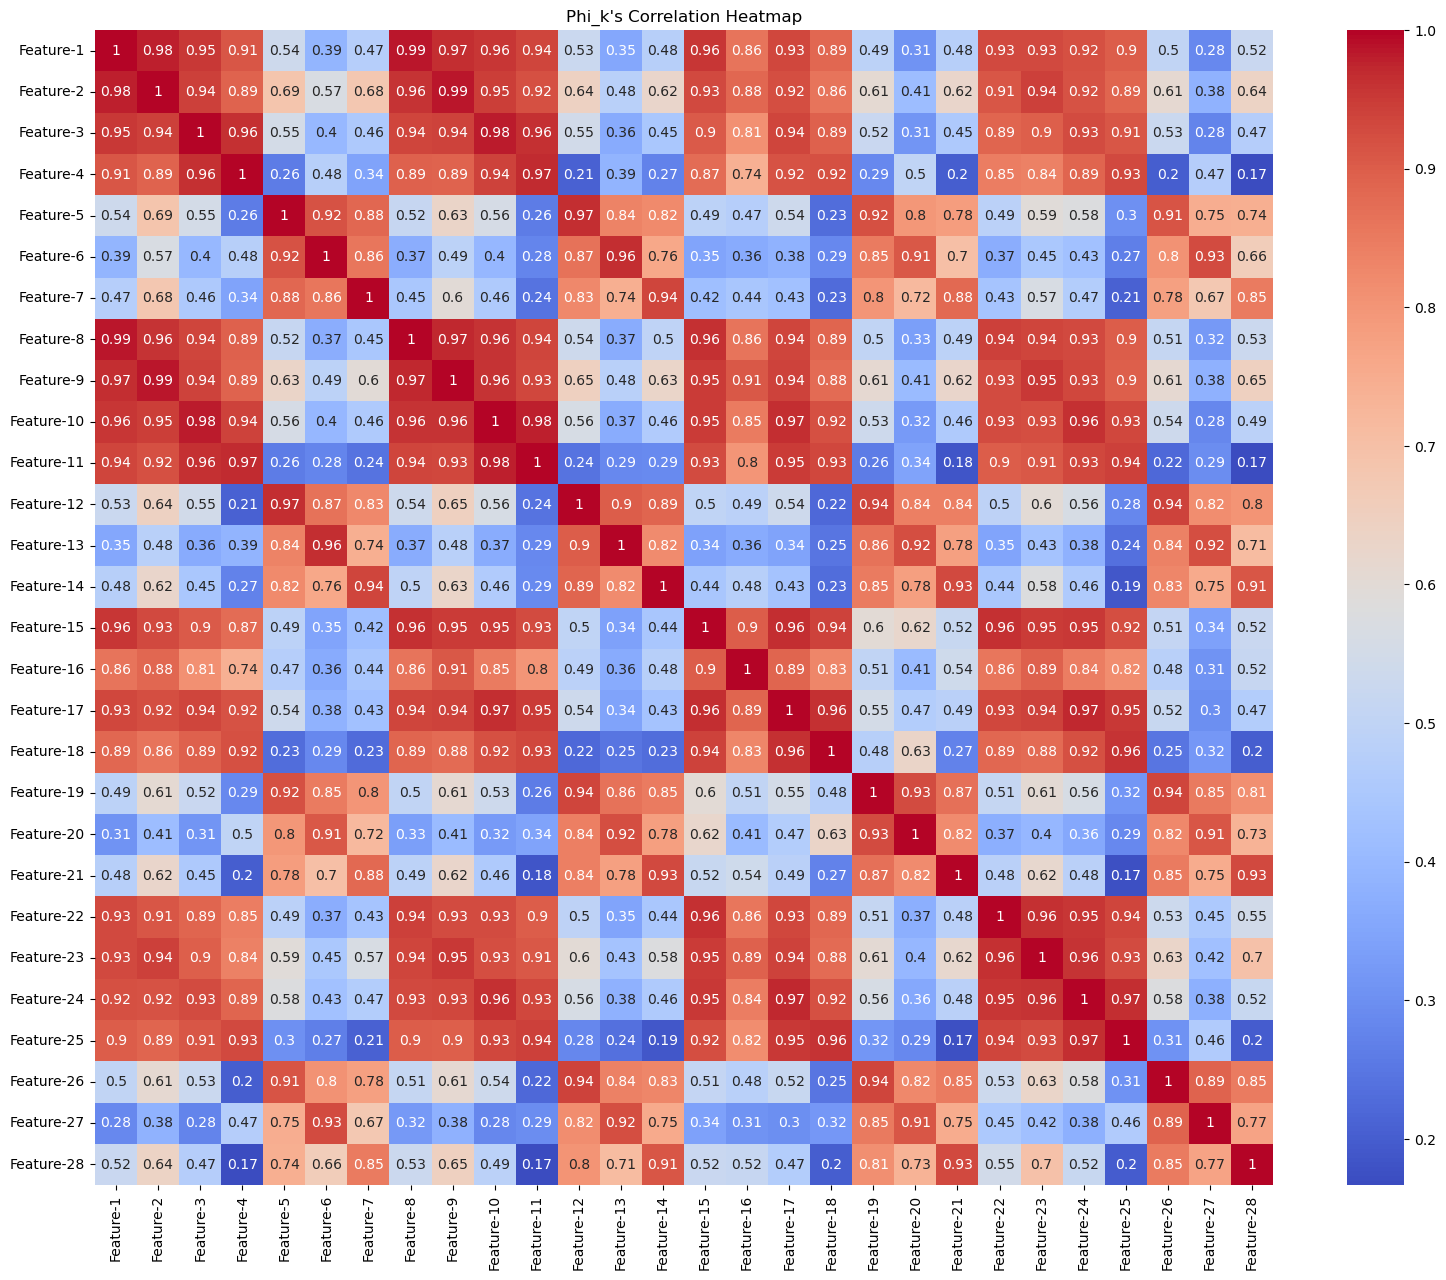

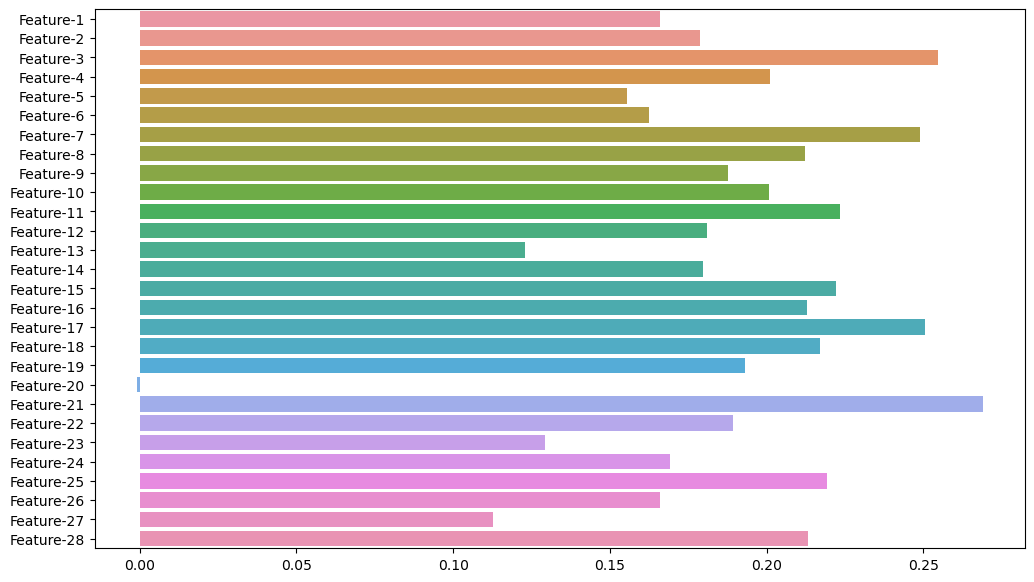

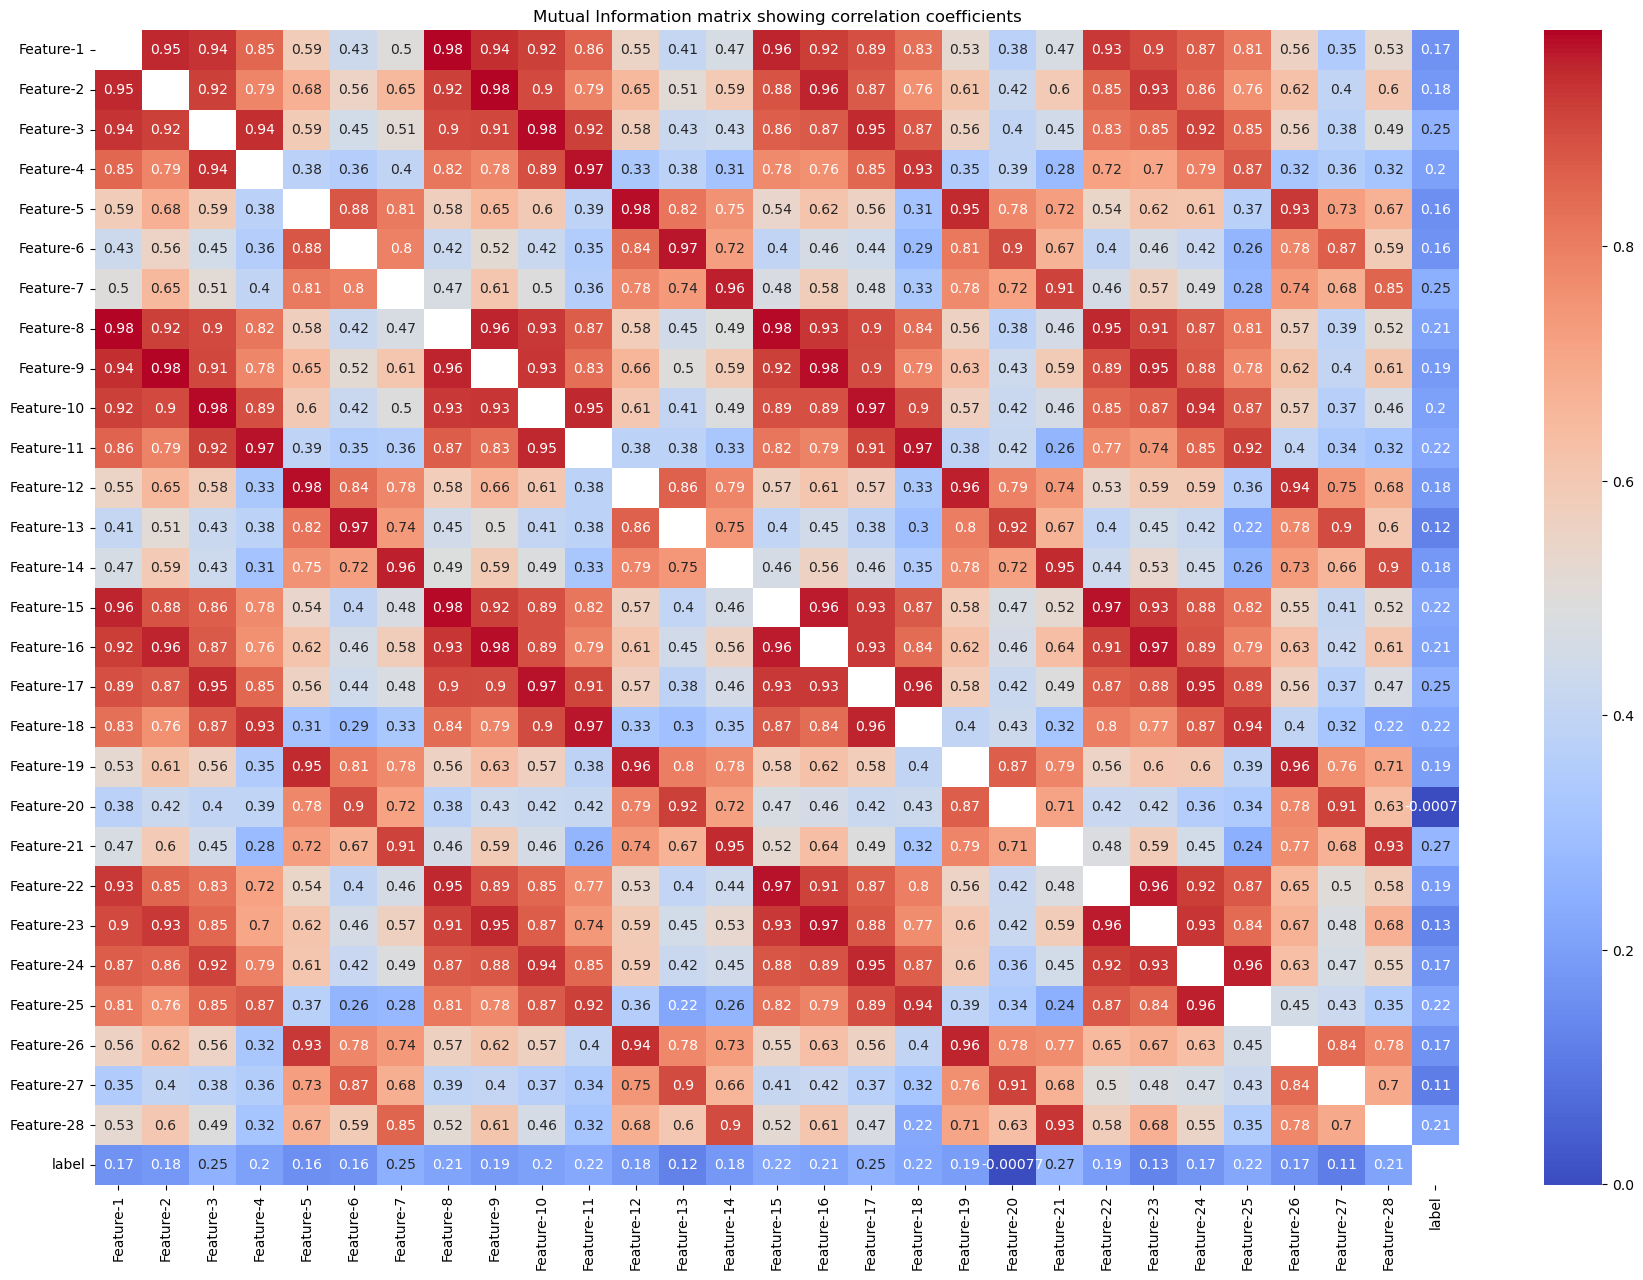

In [3]:
FeatureInfo(data) 
# PearsonCorrelation(data)
FiCorrelation(data)
MutualInformation(data)

Random Forest handles irrelevant features well and is robust to outliers